# 🐶 End-to-end Multil-class Dog Breed Classification

This notebook builds an end-to-end multi-class image classifier using TensorFlow 2.x and TensorFlow Hub.

## 1. Problem

Identifying the breed of a dog given an image of a dog.

When I'm sitting at the cafe and I take a photo of a dog, I want to know what breed of dog it is.

## 2. Data

The data we're using is from Kaggle's dog breed identification competition.

https://www.kaggle.com/c/dog-breed-identification/data 

## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features

Some information about the data:
* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10,000+ images in the training set (these images have labels).
* There are around 10,000+ images in the test set (these images have no labels, because we'll want to predict them). 


In [34]:
# unzip the drive folder
#!unzip "drive/My Drive/Dog Vision/dog-breed-identification.zip" -d "drive/My Drive/Dog Vision/"

In [35]:
import tensorflow as tf
import tensorflow_hub as hub
print("TF hub version:", hub.__version__)
print("tensorflow version:", tf.__version__)

print("GPU ", "available 🙂" if tf.config.list_physical_devices("GPU") else "no available ):")

TF hub version: 0.8.0
tensorflow version: 2.3.0
GPU  available 🙂


In [36]:
import pandas as pd
labels_csv = pd.read_csv('drive/My Drive/Dog Vision/labels.csv')
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,8ab260e1bd12a31b64d2e197033bce20,scottish_deerhound
freq,1,126


In [37]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


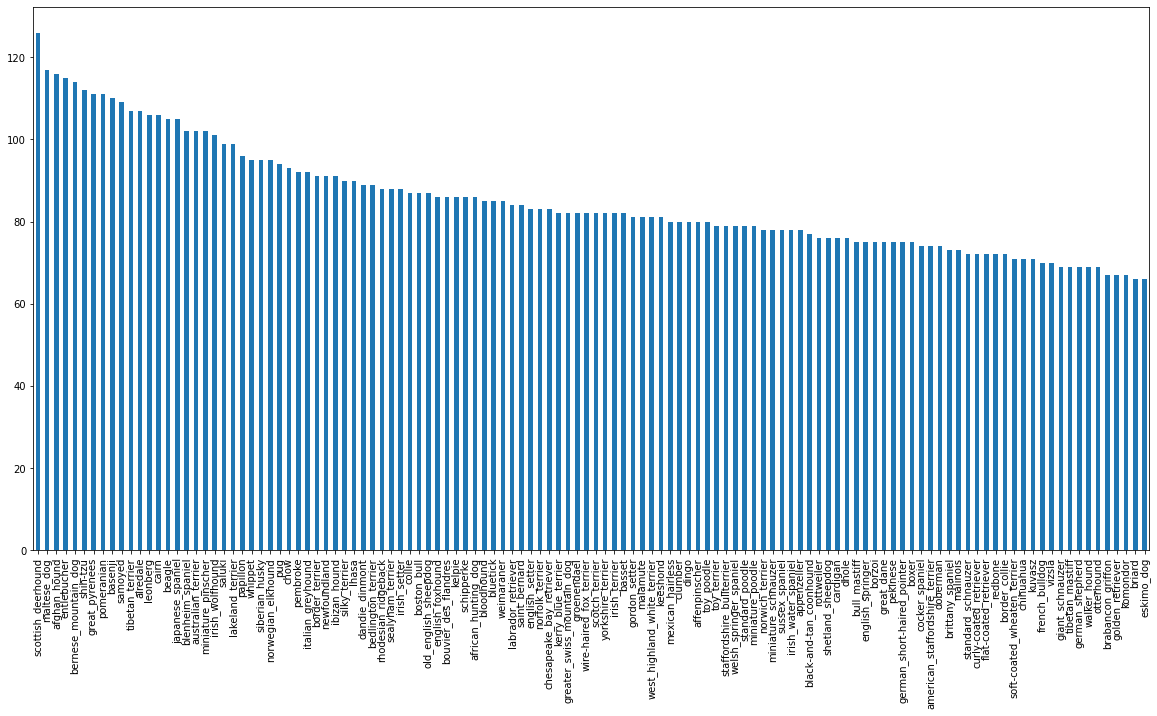

In [38]:
# How many images are there for each breed
labels_csv['breed'].value_counts().plot.bar(figsize=(20,10))

In [39]:
labels_csv['breed'].value_counts().mean()

85.18333333333334

In [40]:
labels_csv['breed'].value_counts().median()

82.0

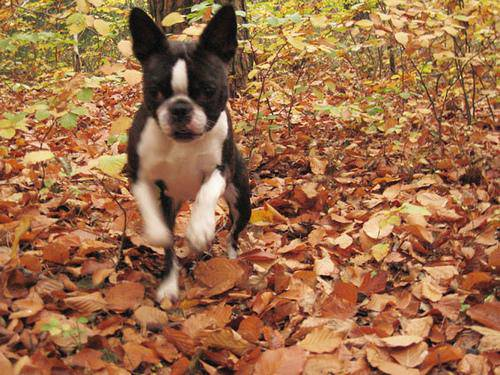

In [41]:
#Let's view an image
from IPython.display import Image
Image('drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

In [42]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


drive/My Drive/Dog Vision/train/e20e32bf114141e20a1af854ca4d0ecc.jpg
tibetan_mastiff


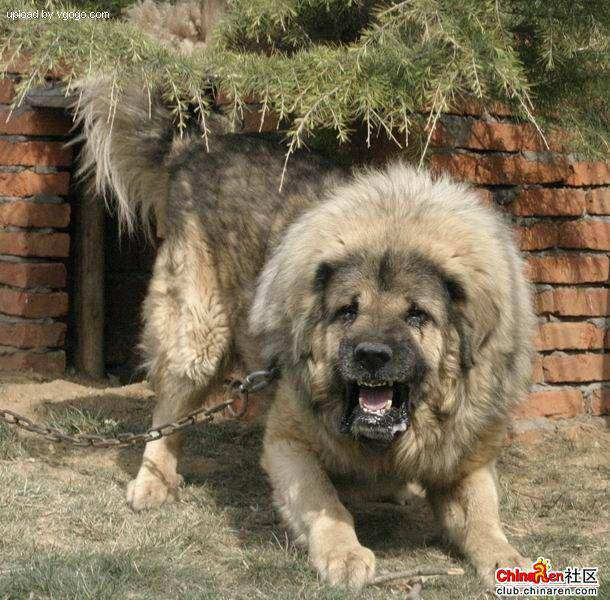

In [43]:
labels_csv.iloc[9000]
fname = ('drive/My Drive/Dog Vision/train/' + labels_csv.iloc[9000]['id'] + '.jpg')
print(fname)
print(labels_csv.iloc[9000]['breed'])
# fname = 'drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg'
Image(fname)
# Image('drive/My Drive/Dog Vision/train/e20e32bf114141e20a1af854ca4d0ecc.jpg')


### Getting images and all their labels
Let's make a list of file name where we store all the file names with the path so that we don't need to write the path again and again

In [44]:
#create path using labels_csv id
filenames = ['drive/My Drive/Dog Vision/train/'+ fname + '.jpg' for fname in labels_csv['id']]

# check first 10
filenames[:10]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [45]:
# check the data we have is in appropriate quatity and nothing is missing there
len(filenames)

10222

In [46]:
labels_csv.iloc[9000]['id']

'e20e32bf114141e20a1af854ca4d0ecc'

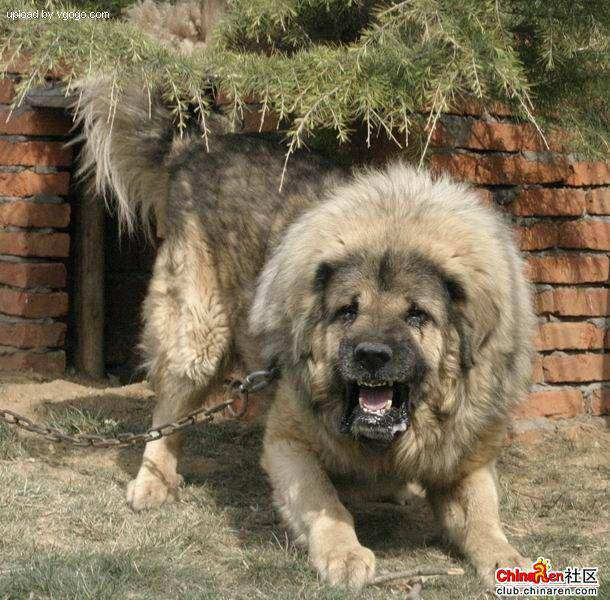

In [47]:
Image('drive/My Drive/Dog Vision/train/e20e32bf114141e20a1af854ca4d0ecc.jpg')

In [48]:
labels_csv.iloc[9000]['breed']

'tibetan_mastiff'

In [49]:
labels_csv['breed'][9000]

'tibetan_mastiff'

In [50]:
len(labels_csv)

10222

In [51]:
import numpy as np
labels = labels_csv['breed'].to_numpy()
# labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [52]:
len(labels)

10222

In [53]:
# see the number of labels matches the number of file name
import os
if len(os.listdir('drive/My Drive/Dog Vision/train/')) == len(filenames):
  print('filenames match with the files, Proceed!!!')
else:
  print('check out the data before Proceeding')

filenames match with the files, Proceed!!!


In [54]:
len(filenames)

10222

In [55]:
len(os.listdir('drive/My Drive/Dog Vision/train/'))

10222

In [56]:
# Find the unique labels
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [57]:
len(unique_breeds)

120

In [58]:
# convert one breed/label into boolean label
print(labels[0])
print(np.where(labels[0] == unique_breeds))
print((labels[0] == unique_breeds).argmax())
print(labels[0] == unique_breeds)

boston_bull
(array([19]),)
19
[False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]


In [59]:
# Now covert all breeds into boolean label
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [60]:
len(boolean_labels)

10222

In [61]:
# Example turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occur
print(boolean_labels[0].argmax()) #index where label occur in boolean array
print(boolean_labels[0].astype(int)) #here we get our data in numeric form

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation data set
since from kaggle data set we have only train and test data set


In [62]:
# setup x and y variables
x = filenames
y = boolean_labels

We're going to start with ~1000 images and increase as needed

In [63]:
#Set the number of images to use for experiment
NUM_IMG = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [64]:
#split the data into train and validation set of size NUM_IMG
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMG], y[:NUM_IMG], test_size=0.2, random_state=42)
len(x_train), len(y_train), len(x_val), len(y_val)

(800, 800, 200, 200)

In [67]:
#Let's have a geez at our data
x_train[:5], y_train[:2], x_val[:5], y_val[:2]

(['drive/My Drive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/My Drive/Dog Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/My Drive/Dog Vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/My Drive/Dog Vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, Fa

## Preprocessing images (turning images into tensors)
To preprocess our image into tensors we're going to write a function which done few things:
1. Take an image file path as input
2. Use tensorflow to read file and save to a variable `image`
3. Turn our `image` (a jpg) to Tensors
4. Resize the `image` to be a shape of (224, 224)
5. Returned the modified `image`

Before importing an image lets see what importing an image looks like

In [69]:
# conver image to numpy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)


Image is generally form with the combination of RGB(Red Green Blue) colors whose value range from 0 to 255

In [71]:
# Let's check
image.max(), image.min()

(255, 0)

In [70]:
# To transfer numpy array into tensors use tf.constant
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  5